In [2]:
from tensorflow import config
config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
import numpy
#import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

nlayer=3
activ='sigmoid'
optim='adam'
xnorm_flag=1
ynorm_flag=1
ntrain=20000
nepochs=40


In [42]:
traindataset='D:/Data/time/lcurve2_1ms_pack%i.npz'
validdataset=traindataset%8
npz=[numpy.load(traindataset%i) for i in range(1,4)]
#npz=numpy.load(traindataset%1)
#xdata=npz['lc']
#ydata=npz['delay']
xdata=numpy.concatenate([[npq['set%s%i'%(str(j) if j>0 else "",i)] for i in range(1,10)] for j,npq in enumerate(npz)])
ydata=numpy.concatenate([[npq['del%s%i'%(str(j) if j>0 else "",i)] for i in range(1,10)] for j,npq in enumerate(npz)])

xmin,xmax=numpy.min(xdata),numpy.max(xdata)
if xnorm_flag == 1:
	xdata=(xdata-xmin)/(xmax-xmin)
#xdata=xdata/numpy.max(xdata,axis=1)[:,numpy.newaxis]
ymin,ymax=numpy.min(ydata),numpy.max(ydata)
if ynorm_flag == 1:
	ydata=(ydata-ymin)/(ymax-ymin)

xtrain=xdata[:ntrain]
ytrain=ydata[:ntrain]

npz_valid=numpy.load(validdataset)
j=8
xdata=numpy.concatenate([npz_valid['set%i%i'%(j-1,i)] for i in range(4)])
ydata=numpy.concatenate([npz_valid['del%i%i'%(j-1,i)] for i in range(4)])
    
#xdata=npz_valid['lc']
#ydata=npz_valid['delay']

xmin,xmax=numpy.min(xdata),numpy.max(xdata)
if xnorm_flag == 1:
	xdata=(xdata-xmin)/(xmax-xmin)
#xdata=xdata/numpy.max(xdata,axis=1)[:,numpy.newaxis]
ymin,ymax=numpy.min(ydata),numpy.max(ydata)
if ynorm_flag == 1:
	ydata=(ydata-ymin)/(ymax-ymin)

xvalid=xdata
yvalid=ydata


In [43]:
from neural import next# import train_me
next.xtrain,next.ytrain=xtrain,ytrain
next.xvalid,next.yvalid=xvalid,yvalid

In [44]:
model=next.train_me("D:/Data/")
model.save("D:/Data/model_%dlayer_%dtrain_%depochs_noynorm_%dpatterns_batch.h5"%(nlayer,ntrain,nepochs,npatterns))

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 0.8164 - val_loss: 0.3632
Epoch 2/100
1/1 [==============================] - 0s 475ms/step - loss: 0.3784 - val_loss: 0.1531
Epoch 3/100
1/1 [==============================] - 0s 500ms/step - loss: 0.1630 - val_loss: 0.0880
Epoch 4/100
1/1 [==============================] - 0s 475ms/step - loss: 0.0901 - val_loss: 0.0908
Epoch 5/100
1/1 [==============================] - 1s 542ms/step - loss: 0.0870 - val_loss: 0.1164
Epoch 6/100
1/1 [==============================] - 1s 538ms/step - loss: 0.1092 - val_loss: 0.1431
Epoch 7/100
1/1 [==============================] - 1s 548ms/step - loss: 0.1343 - val_loss: 0.1620
Epoch 8/100
1/1 [==============================] - 1s 545ms/step - loss: 0.1526 - val_loss: 0.1711
Epoch 9/100
1/1 [==============================] - 1s 544ms/step - loss: 0.1619 - val_loss: 0.1715
Epoch 10/100
1/1 [==============================] - 1s 538ms/step - loss: 0.1627 - val_loss: 0.1653
Epoch 11/100

1/1 [==============================] - 1s 557ms/step - loss: 0.0778 - val_loss: 0.0786
Epoch 77/100
1/1 [==============================] - 1s 562ms/step - loss: 0.0775 - val_loss: 0.0783
Epoch 78/100
1/1 [==============================] - 1s 552ms/step - loss: 0.0773 - val_loss: 0.0780
Epoch 79/100
1/1 [==============================] - 1s 560ms/step - loss: 0.0771 - val_loss: 0.0777
Epoch 80/100
1/1 [==============================] - 1s 566ms/step - loss: 0.0768 - val_loss: 0.0775
Epoch 81/100
1/1 [==============================] - 1s 556ms/step - loss: 0.0766 - val_loss: 0.0772
Epoch 82/100
1/1 [==============================] - 1s 552ms/step - loss: 0.0764 - val_loss: 0.0769
Epoch 83/100
1/1 [==============================] - 1s 559ms/step - loss: 0.0761 - val_loss: 0.0766
Epoch 84/100
1/1 [==============================] - 1s 539ms/step - loss: 0.0759 - val_loss: 0.0763
Epoch 85/100
1/1 [==============================] - 1s 561ms/step - loss: 0.0756 - val_loss: 0.0760
Epoch 86/100


NameError: name 'npatterns' is not defined

In [29]:
from imp import reload
from neural import next
reload(next)

<module 'neural.next' from 'C:\\Users\\159565\\Code\\neural\\next.py'>

In [45]:
model.save("D:/Data/model_%dlayer_%dtrain_%depochs_noynorm_%dpatterns_batch.h5"%(nlayer,ntrain,nepochs,10000))

In [46]:
next.ynorm_flag=1
diff=next.predict(model,xvalid,yvalid,"D:/Data/")

(0.2273918786375855, 4000)

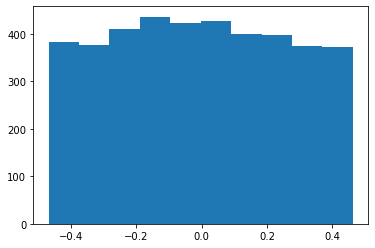

In [47]:
from matplotlib import pyplot as pl
%matplotlib inline
pl.hist(diff)
abs(diff).mean(),len(diff)